In [1]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'},
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'},
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'},
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'},
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'},
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'},
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'},
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'},
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'},
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'},
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'},
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'},
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'},
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'},
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

In [2]:
target = [d['drug'] for d in data]
target

['A',
 'D',
 'B',
 'C',
 'D',
 'C',
 'A',
 'B',
 'D',
 'C',
 'B',
 'C',
 'B',
 'D',
 'A',
 'C',
 'B',
 'D',
 'A']

In [3]:
[d.pop('drug') for d in data];

Text(0, 0.5, 'potassium')

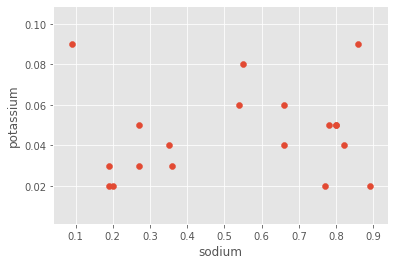

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

age = [d['age'] for d in data]
sodium = [d['Na'] for d in data]
potassium = [d['K'] for d in data]

plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')

In [5]:
# ord(A) = 65
target = [ord(t) - 65 for t in target]
target

[0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 1, 2, 1, 3, 0, 2, 1, 3, 0]

Text(0, 0.5, 'sodium (Na)')

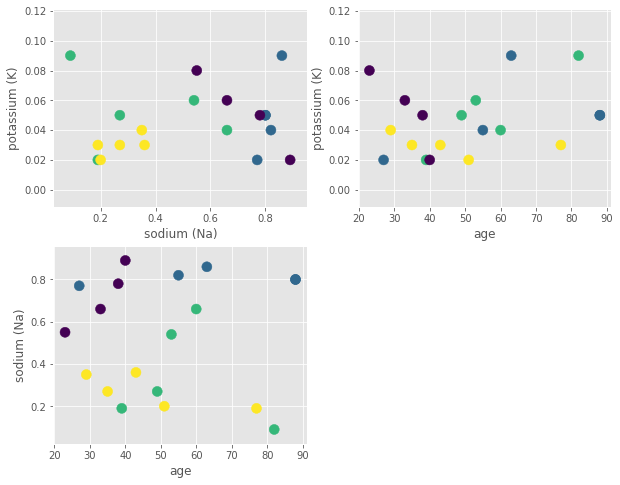

In [6]:
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.scatter(sodium, potassium, c=target, s=100)
plt.xlabel('sodium (Na)')
plt.ylabel('potassium (K)')

plt.subplot(222)
plt.scatter(age, potassium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('potassium (K)')

plt.subplot(223)
plt.scatter(age, sodium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('sodium (Na)')

In [7]:
# カテゴリ特徴量を数値特徴量に変換
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)

vec.get_feature_names()

['BP=high',
 'BP=low',
 'BP=normal',
 'K',
 'Na',
 'age',
 'cholesterol=high',
 'cholesterol=normal',
 'sex=F',
 'sex=M']

In [8]:
data_pre[0]

array([ 1.  ,  0.  ,  0.  ,  0.06,  0.66, 33.  ,  1.  ,  0.  ,  1.  ,
        0.  ])

In [9]:
# データ変数をOpenCVと互換性を持たせるために、全てfloatに変換
import numpy as np
data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32)

In [10]:
# 学習セットと評価セットに分ける
import sklearn.model_selection as ms
# ※15:5に分けてる
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

In [ ]:
import cv2

dtree = cv2.ml.DTrees_create()
dtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
y_pred = dtree.predict(X_test)